<a href="https://colab.research.google.com/github/hirokimituya/book_stock-price-analysis/blob/main/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【実践】Pythonで株の取引データを分析し予測してみよう！

## 概要
以下URLの記事を参考にすすめる

## URL
https://toukei-lab.com/python_stock

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import yfinance as yf

# ターゲットを指定
ticker = 'AMZN'

# データを収集
data = yf.download(ticker, period='7d', interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-17,99.790001,100.660004,97.459999,98.949997,98.949997,87173200
2023-03-20,98.410004,98.480003,95.699997,97.709999,97.709999,62388900
2023-03-21,98.139999,100.849998,98.000000,100.610001,100.610001,58597300
2023-03-22,100.449997,102.099998,98.610001,98.699997,98.699997,57475400
2023-03-23,100.430000,101.059998,97.620003,98.709999,98.709999,57559300
2023-03-24,98.070000,98.300003,96.400002,98.129997,98.129997,56095400
2023-03-27,99.070000,99.339996,97.080002,98.040001,98.040001,46674700


<Axes: xlabel='Date'>

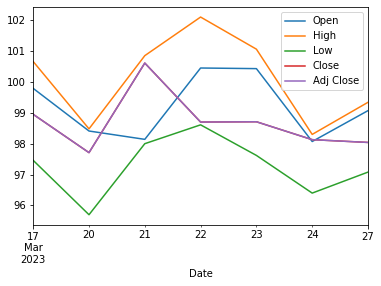

In [3]:
df = data
df = df.drop('Volume', axis=1)

# 可視化する
df.plot()

In [4]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 2.3 MB/s eta 0:00:00


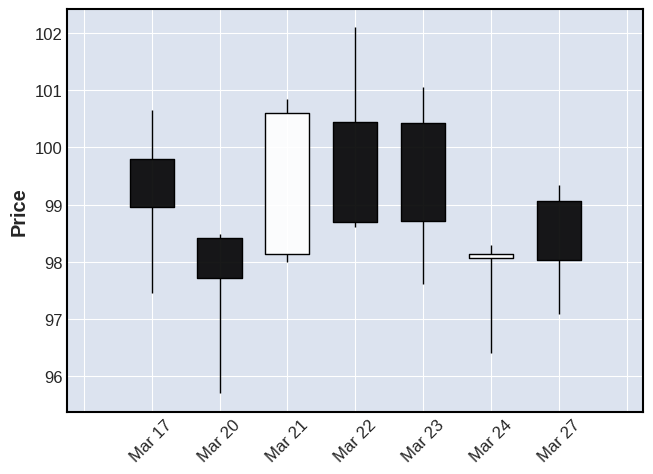

In [5]:
import mplfinance as mpf

# ローソク足グラフの表示
mpf.plot(df, type='candle')

[*********************100%***********************]  1 of 1 completed


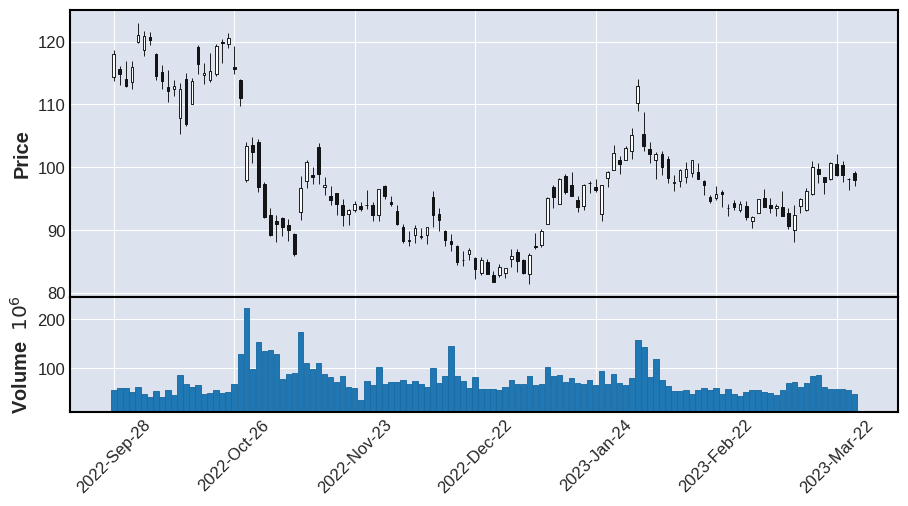

In [6]:
# データを収集
df = yf.download(ticker, period='6mo', interval='1d')
# ローソク足グラフの表示
mpf.plot(df, type='candle', volume=True, figratio=(10, 5))

In [7]:
# データを収集
data = yf.download(ticker, period='6mo', interval='1d')
# 移動平均を使用に加える
price = df['Close']
span = 5
df['sma05'] = price.rolling(window=span, min_periods=1).mean()

[*********************100%***********************]  1 of 1 completed


In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,sma05
Date,,,,,,,
2022-09-28,114.379997,118.699997,113.800003,118.010002,118.010002,55763800,118.010002
2022-09-29,115.599998,116.070000,113.059998,114.800003,114.800003,58969700,116.405003
2022-09-30,114.080002,116.919998,112.839996,113.000000,113.000000,59479600,115.270002
2022-10-03,113.580002,116.910004,112.449997,115.879997,115.879997,50941900,115.422501
2022-10-04,119.889999,123.000000,119.790001,121.089996,121.089996,62812600,116.556000
...,...,...,...,...,...,...,...
2023-03-21,98.139999,100.849998,98.000000,100.610001,100.610001,58597300,98.701999
2023-03-22,100.449997,102.099998,98.610001,98.699997,98.699997,57475400,99.201999
2023-03-23,100.430000,101.059998,97.620003,98.709999,98.709999,57559300,98.935999


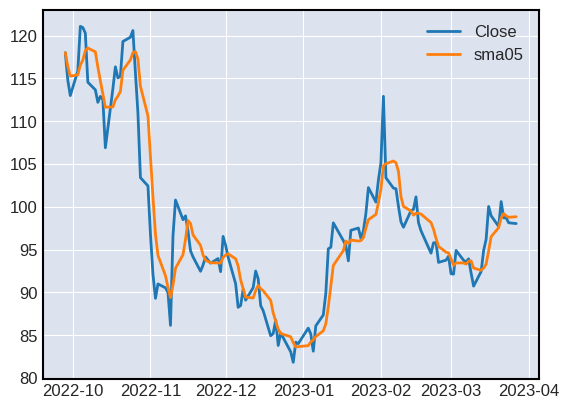

In [9]:
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['sma05'], label='sma05')
plt.legend()

In [10]:
# ARIMAモデル データ準備
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
train_data = train_data['Close'].values
test_data = test_data['Close'].values

In [11]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [13]:
# ARIMAモデル実装
model = ARIMA(train_data, order=(6, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   86
Model:                 ARIMA(6, 1, 0)   Log Likelihood                -210.109
Date:                Tue, 28 Mar 2023   AIC                            434.219
Time:                        09:51:37   BIC                            451.317
Sample:                             0   HQIC                           441.096
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1378      0.120      1.147      0.251      -0.098       0.373
ar.L2          0.0288      0.124      0.233      0.816      -0.214       0.272
ar.L3          0.0077      0.133      0.058      0.9

In [14]:
# ARIMAモデル　予測
history = [x for x in train_data]
model_predictions = []
for time_point in range(len(test_data)):
    # ARIMAモデル　実装
    model = ARIMA(history, order=(6, 1, 0))
    model_fit = model.fit()

    # 予測データの出力
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)

    # トレーニングデータの取り込み
    true_test_value = test_data[time_point]
    history.append(true_test_value)

In [16]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1


In [21]:
# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# matplotlib日本語化対応
import japanize_matplotlib

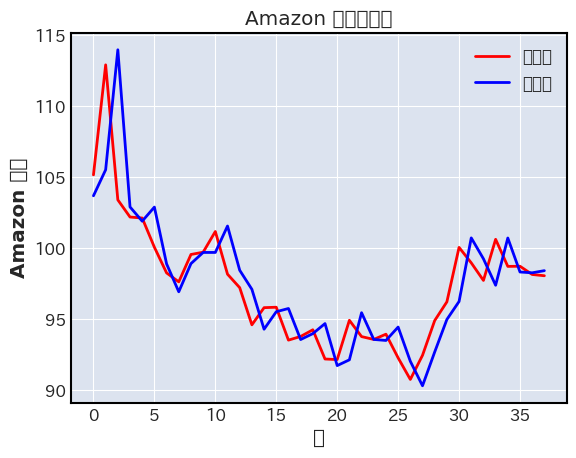

In [22]:
# 可視化
plt.plot(test_data, color='Red', label='実績値')
plt.plot(model_predictions, color='Blue', label='予測値')
plt.title('Amazon 株価予測値', fontname="MS Gothic")
plt.xlabel('日', fontname="MS Gothic")
plt.ylabel('Amazon 株価', fontname="MS Gothic")
plt.legend(prop={"family":"MS Gothic"})
plt.show()